In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [37]:
path = r"D:\DAP391m\1_mat1\dataset\lab1_kc_house_data.csv"
df = pd.read_csv(path)

## Q1

In [38]:
#Display the data types of each column using the function dtypes
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

## Q2

In [39]:
#Drop the columns "id" and "Unnamed: 0" from axis 1 using the method drop(), then use the method describe() to obtain a statistical summary of the data
print(df.columns)
#'Unnamed: 0' is not in the dataset)
df = df.drop(['id'], axis=1)
summary = df.describe()
print(summary)


Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')
              price      bedrooms     bathrooms   sqft_living      sqft_lot  \
count  2.161300e+04  21613.000000  21613.000000  21613.000000  2.161300e+04   
mean   5.400881e+05      3.370842      2.114757   2079.899736  1.510697e+04   
std    3.671272e+05      0.930062      0.770163    918.440897  4.142051e+04   
min    7.500000e+04      0.000000      0.000000    290.000000  5.200000e+02   
25%    3.219500e+05      3.000000      1.750000   1427.000000  5.040000e+03   
50%    4.500000e+05      3.000000      2.250000   1910.000000  7.618000e+03   
75%    6.450000e+05      4.000000      2.500000   2550.000000  1.068800e+04   
max    7.700000e+06     33.000000      8.000000  13540.000000  1.651359e

## Q3

In [40]:
# Count unique floor values and convert to dataframe
floor_counts = df['floors'].value_counts().to_frame()
print(floor_counts)


        count
floors       
1.0     10680
2.0      8241
1.5      1910
3.0       613
2.5       161
3.5         8


## Q4

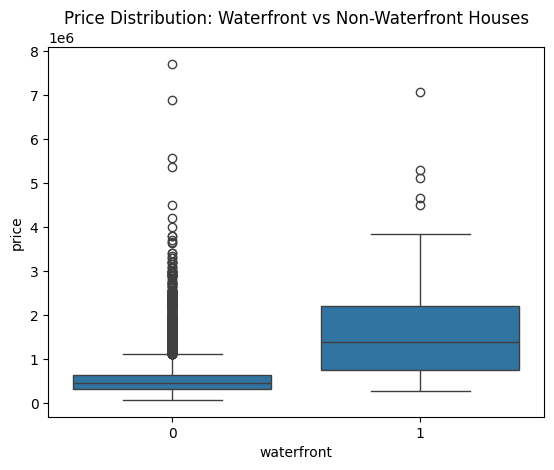

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create boxplot to compare price outliers for waterfront and non-waterfront houses
sns.boxplot(x='waterfront', y='price', data=df)
plt.title('Price Distribution: Waterfront vs Non-Waterfront Houses')
plt.show()

## Q5

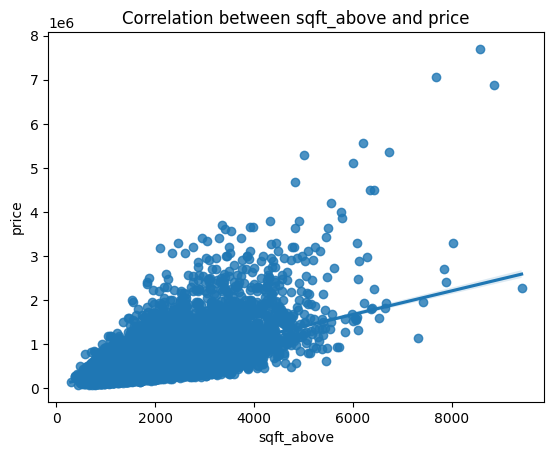

In [42]:
sns.regplot(x='sqft_above', y='price', data=df)
plt.title('Correlation between sqft_above and price')
plt.show()

## Q6

In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

X = df[['sqft_living']]
y = df['price']
model = LinearRegression()
model.fit(X, y)

r2 = r2_score(y, model.predict(X))
print(f"R^2 score: {r2}")


R^2 score: 0.4928532179037931


## Q7

In [44]:
features = ["floors", "waterfront", "lat", "bedrooms", "sqft_basement", "view", "bathrooms", "sqft_living15", "sqft_above", "grade", "sqft_living"]
X = df[features]
y = df['price']
model = LinearRegression()
model.fit(X, y)

r2 = r2_score(y, model.predict(X))
print(f"R^2 score: {r2}")

R^2 score: 0.6577151058279326


## Q8

In [45]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

estimators = [
    ('scale', StandardScaler()), 
    ('polynomial', PolynomialFeatures(include_bias=False)), 
    ('model', LinearRegression())
]

print(estimators)


[('scale', StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model', LinearRegression())]


## Q9

In [46]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

features = ["floors", "waterfront", "lat", "bedrooms", "sqft_basement", "view", "bathrooms", "sqft_living15", "sqft_above", "grade", "sqft_living"]
X = df[features]
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
pipeline = Pipeline(estimators)
pipeline.fit(X_train, y_train)

r2 = pipeline.score(X_test, y_test)
print(f"R²: {r2}")


R²: 0.7116607289383633


## Q10

In [47]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=0.1)
ridge.fit(X_train, y_train)
r2_ridge = ridge.score(X_test, y_test)
print(f"R² (Ridge Regression): {r2_ridge}")


R² (Ridge Regression): 0.6614734596866666


## Q11

In [48]:
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
ridge_poly = Ridge(alpha=0.1)
ridge_poly.fit(X_train_poly, y_train)

r2_poly_ridge = ridge_poly.score(X_test_poly, y_test)
print(f"R² (Polynomial + Ridge Regression): {r2_poly_ridge}")


R² (Polynomial + Ridge Regression): 0.7003486856916399
